<a href="https://colab.research.google.com/github/jonatanriq/oceanografia/blob/main/sedimentologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Realizando os imports e a leitura do dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dados = pd.read_csv('/content/transporte.sedimentar.csv')
dados

In [ ]:
perfis = []
for i in np.arange(1,20,1):
  perfis.append(f'Perfil {i}')
perfis
dados['Perfil'] = perfis
dados

,Perfil,Fluxo Médio de Energia [J/(m.s^-1)],Direção[N],Q[m^3]
0,Perfil 1,6063.37,135.09,2735792.51
1,Perfil 2,1010.59,149.91,758338.24
2,Perfil 3,1642.15,152.42,1644623.38
3,Perfil 4,1986.07,160.48,1361468.77
4,Perfil 5,808.78,169.77,249124.42
5,Perfil 6,573.70,172.15,269391.72
6,Perfil 7,480.42,168.22,186529.53
7,Perfil 8,990.13,163.34,749674.50
8,Perfil 9,537.40,165.72,423695.92
9,Perfil 10,1551.47,169.49,705370.51


## Plot dos perfis de coleta de sedimento

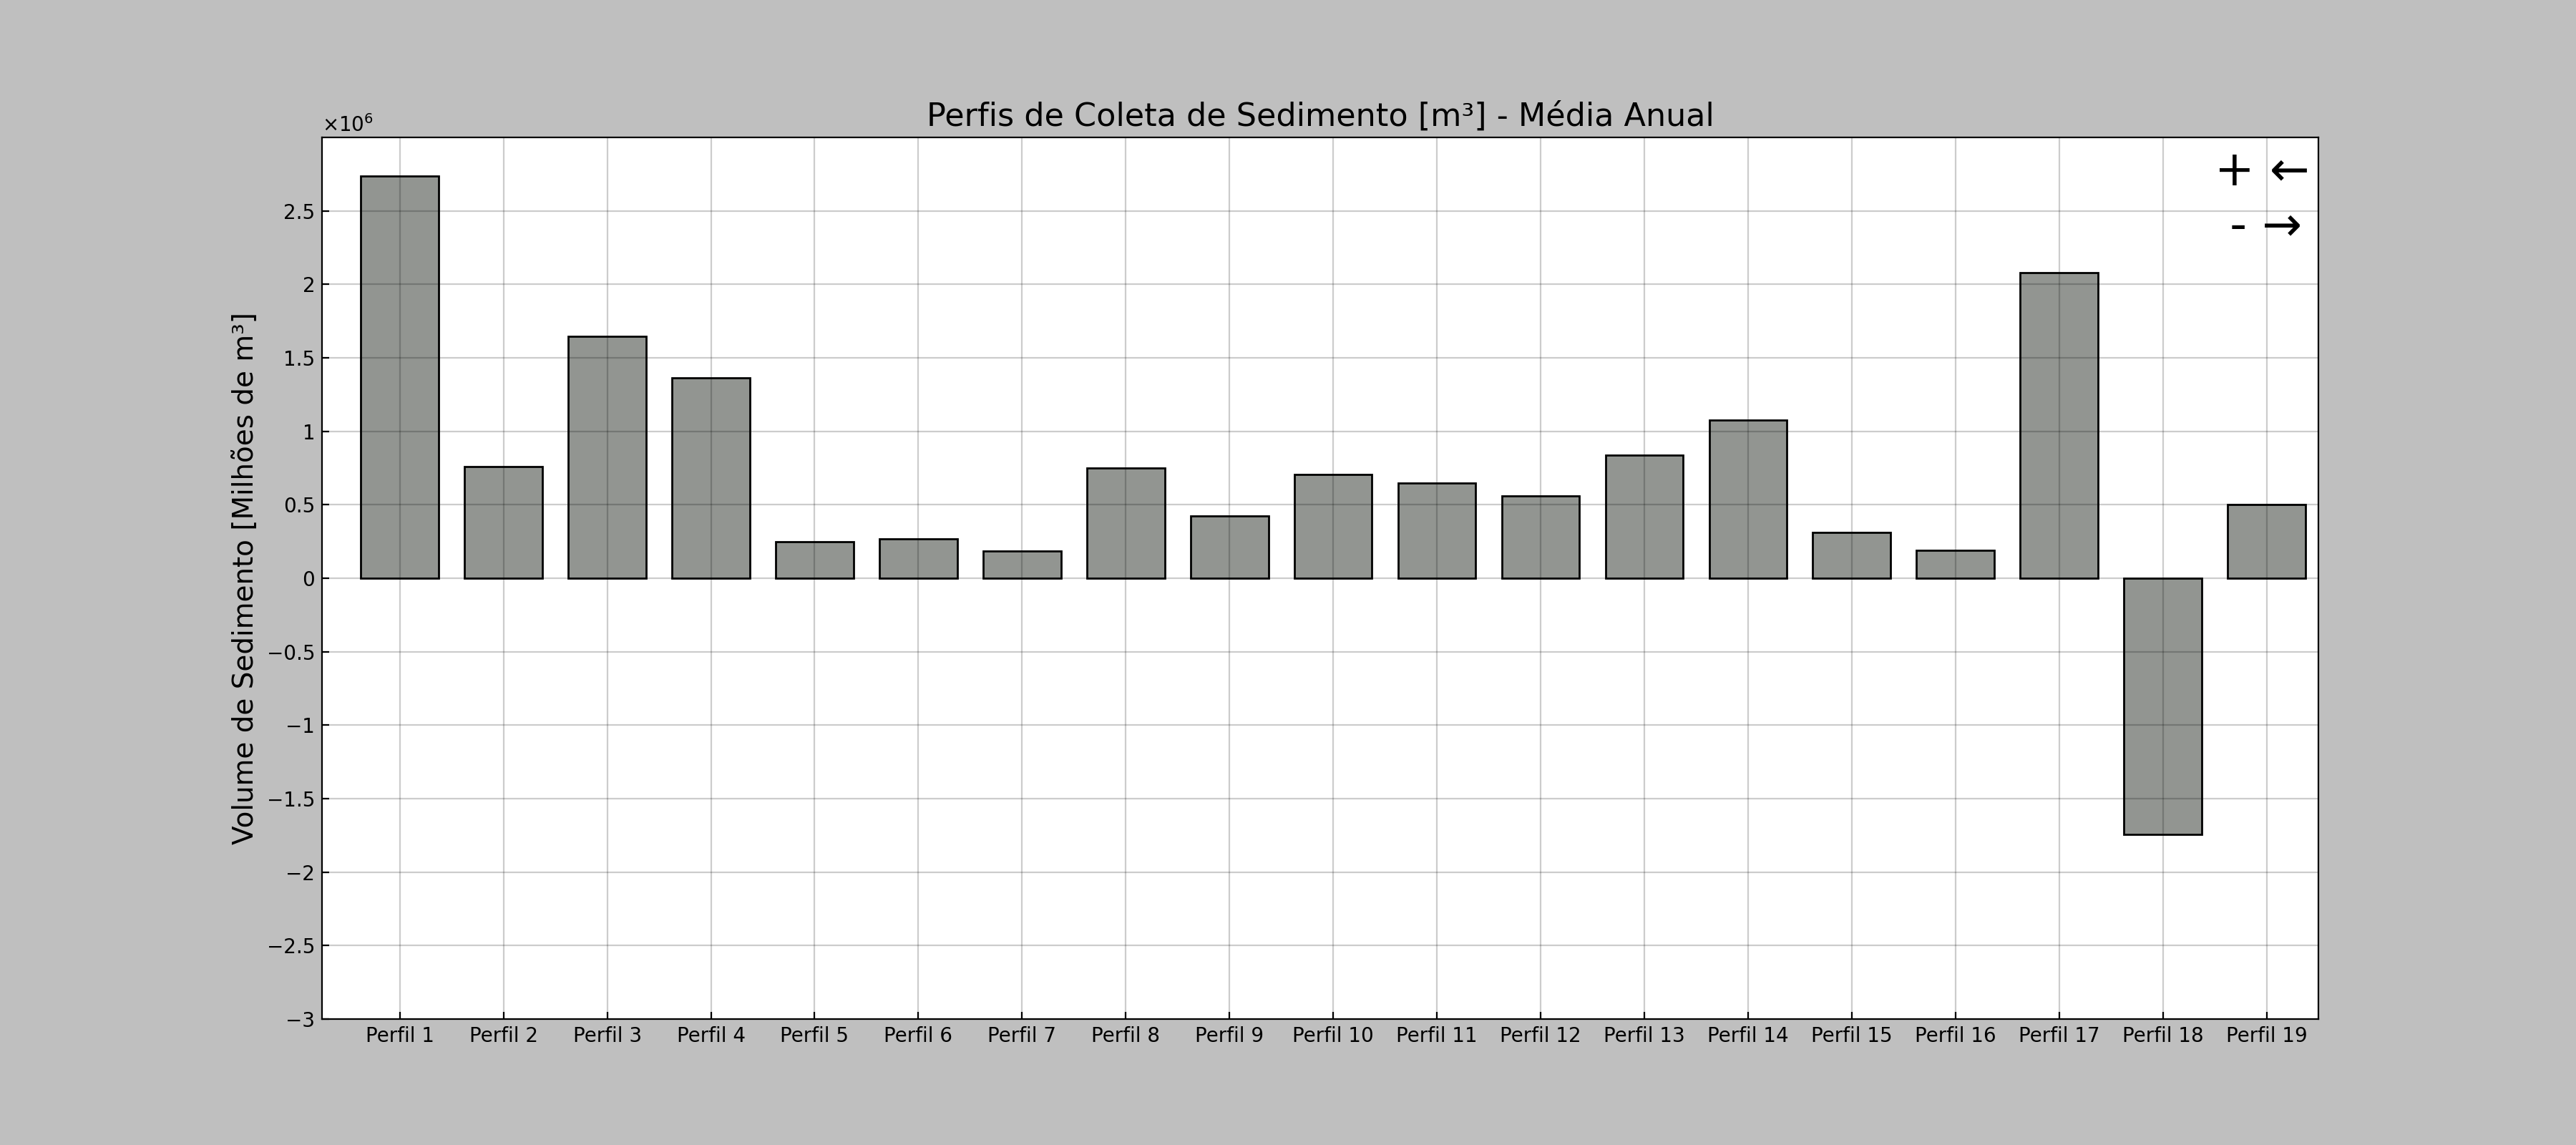

In [ ]:
plt.figure(figsize=(18,8))
plt.style.use('grayscale')


plt.bar(dados['Perfil'], dados['Q[m^3]'],width=0.75, edgecolor='k', color='grey')
plt.grid(alpha=0.2)


plt.ylim(-3000000,3000000)
plt.xlim(-0.75, 18.5)

plt.yticks(np.arange(-3000000,3000000,500000))
plt.ylabel('Volume de Sedimento [Milhões de m³]', fontsize=14)

plt.title('Perfis de Coleta de Sedimento [m³] - Média Anual', fontsize=16)
plt.text(17.5,2300000,'+ ←\n - →', fontsize=24)

plt.tick_params(axis="y",direction="in",)
plt.tick_params(axis="x",direction="in",)


plt.show()

## Trabalhando os dados do GRADISTAT

Colocando os valores de desvio padrão, curtose, assimetria e valor mediano (D50)

In [ ]:
dados.Perfil[18]

'Perfil 19'

In [ ]:
sedimentos = pd.read_csv('/content/graficosd50.csv', decimal=",")
sedimentos = sedimentos[sedimentos.columns[1:]]
sedimentos

,Unnamed: 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,D50,"540,4","513,6","329,9","349,8","545,2","329,3","547,2","332,3","314,6","306,7","509,4","323,5","316,2","301,5","302,2","287,0","318,0","298,5","317,8"
1,Sorting,"1,426","1,438","1,521","1,735","1,420","1,429","1,419","1,430","1,523","1,517","1,428","1,421","1,410","1,330","1,515","1,365","1,543","1,311","1,406"
2,Kurtose,"0,603","0,583","0,818","1,115","0,611","0,595","0,615","0,590","0,933","2,355","0,578","0,609","0,647","2,543","2,391","1,722","0,908","2,563","0,644"
3,Selecionamento,Moderately Well Sorted,Moderately Well Sorted,Moderately Sorted,Moderately Well Sorted,Moderately Well Sorted,Moderately Well Sorted,Moderately Well Sorted,Moderately Well Sorted,Moderately Well Sorted,Moderately Well Sorted,Moderately Well Sorted,Well Sorted,Well Sorted,Moderately Well Sorted,Well Sorted,Moderately Well Sorted,Moderately Well Sorted,Well Sorted,Well Sorted
4,Q(m^3),"631356,75","-39497,21","409942,77","2120718,43","430147,44","1617484,79","656300,58","333441,91","190505,29","356694,93","342639,14","397367,61","1464382,19","73553,52","1000487,1","185497,09","30418,79","2171440,07","-2242977,16"


In [ ]:
sedimento = sedimentos.T
sedimento.columns = sedimento.iloc[0]
sedimento = sedimento[1:]
sedimento['perfis'] = perfis
sedimento
sedimento['D50'] = [x.replace(',', '.') for x in sedimento['D50']]

In [ ]:
for i in sedimento.columns[0:3]:
  sedimento[f'{i}'] = [x.replace(',', '.') for x in sedimento[f'{i}']]
  sedimento[f'{i}'] = sedimento[f'{i}'].astype(float)

In [ ]:
assimetria = [0.514,0.439,-0.264,0.039,0.527,-0.484,0.530,-0.466,-0.289,-0.281,0.421,-0.509,-0.538,-0.028,-0.267,0.562,-0.262,-0.014,-0.545]
sedimento['Assimetria'] = assimetria 
sedimento

Unnamed: 1,D50,Sorting,Kurtose,Selecionamento,Q(m^3),perfis,Assimetria
1,540.4,1.426,0.603,Moderately Well Sorted,"631356,75",Perfil 1,0.514
2,513.6,1.438,0.583,Moderately Well Sorted,"-39497,21",Perfil 2,0.439
3,329.9,1.521,0.818,Moderately Sorted,"409942,77",Perfil 3,-0.264
4,349.8,1.735,1.115,Moderately Well Sorted,"2120718,43",Perfil 4,0.039
5,545.2,1.420,0.611,Moderately Well Sorted,"430147,44",Perfil 5,0.527
6,329.3,1.429,0.595,Moderately Well Sorted,"1617484,79",Perfil 6,-0.484
7,547.2,1.419,0.615,Moderately Well Sorted,"656300,58",Perfil 7,0.530
8,332.3,1.430,0.590,Moderately Well Sorted,"333441,91",Perfil 8,-0.466
9,314.6,1.523,0.933,Moderately Well Sorted,"190505,29",Perfil 9,-0.289
10,306.7,1.517,2.355,Moderately Well Sorted,"356694,93",Perfil 10,-0.281


## Plotando os dados 

usando o ***plt.subplots()*** vou colocar todos esses dados em uma só imagem!

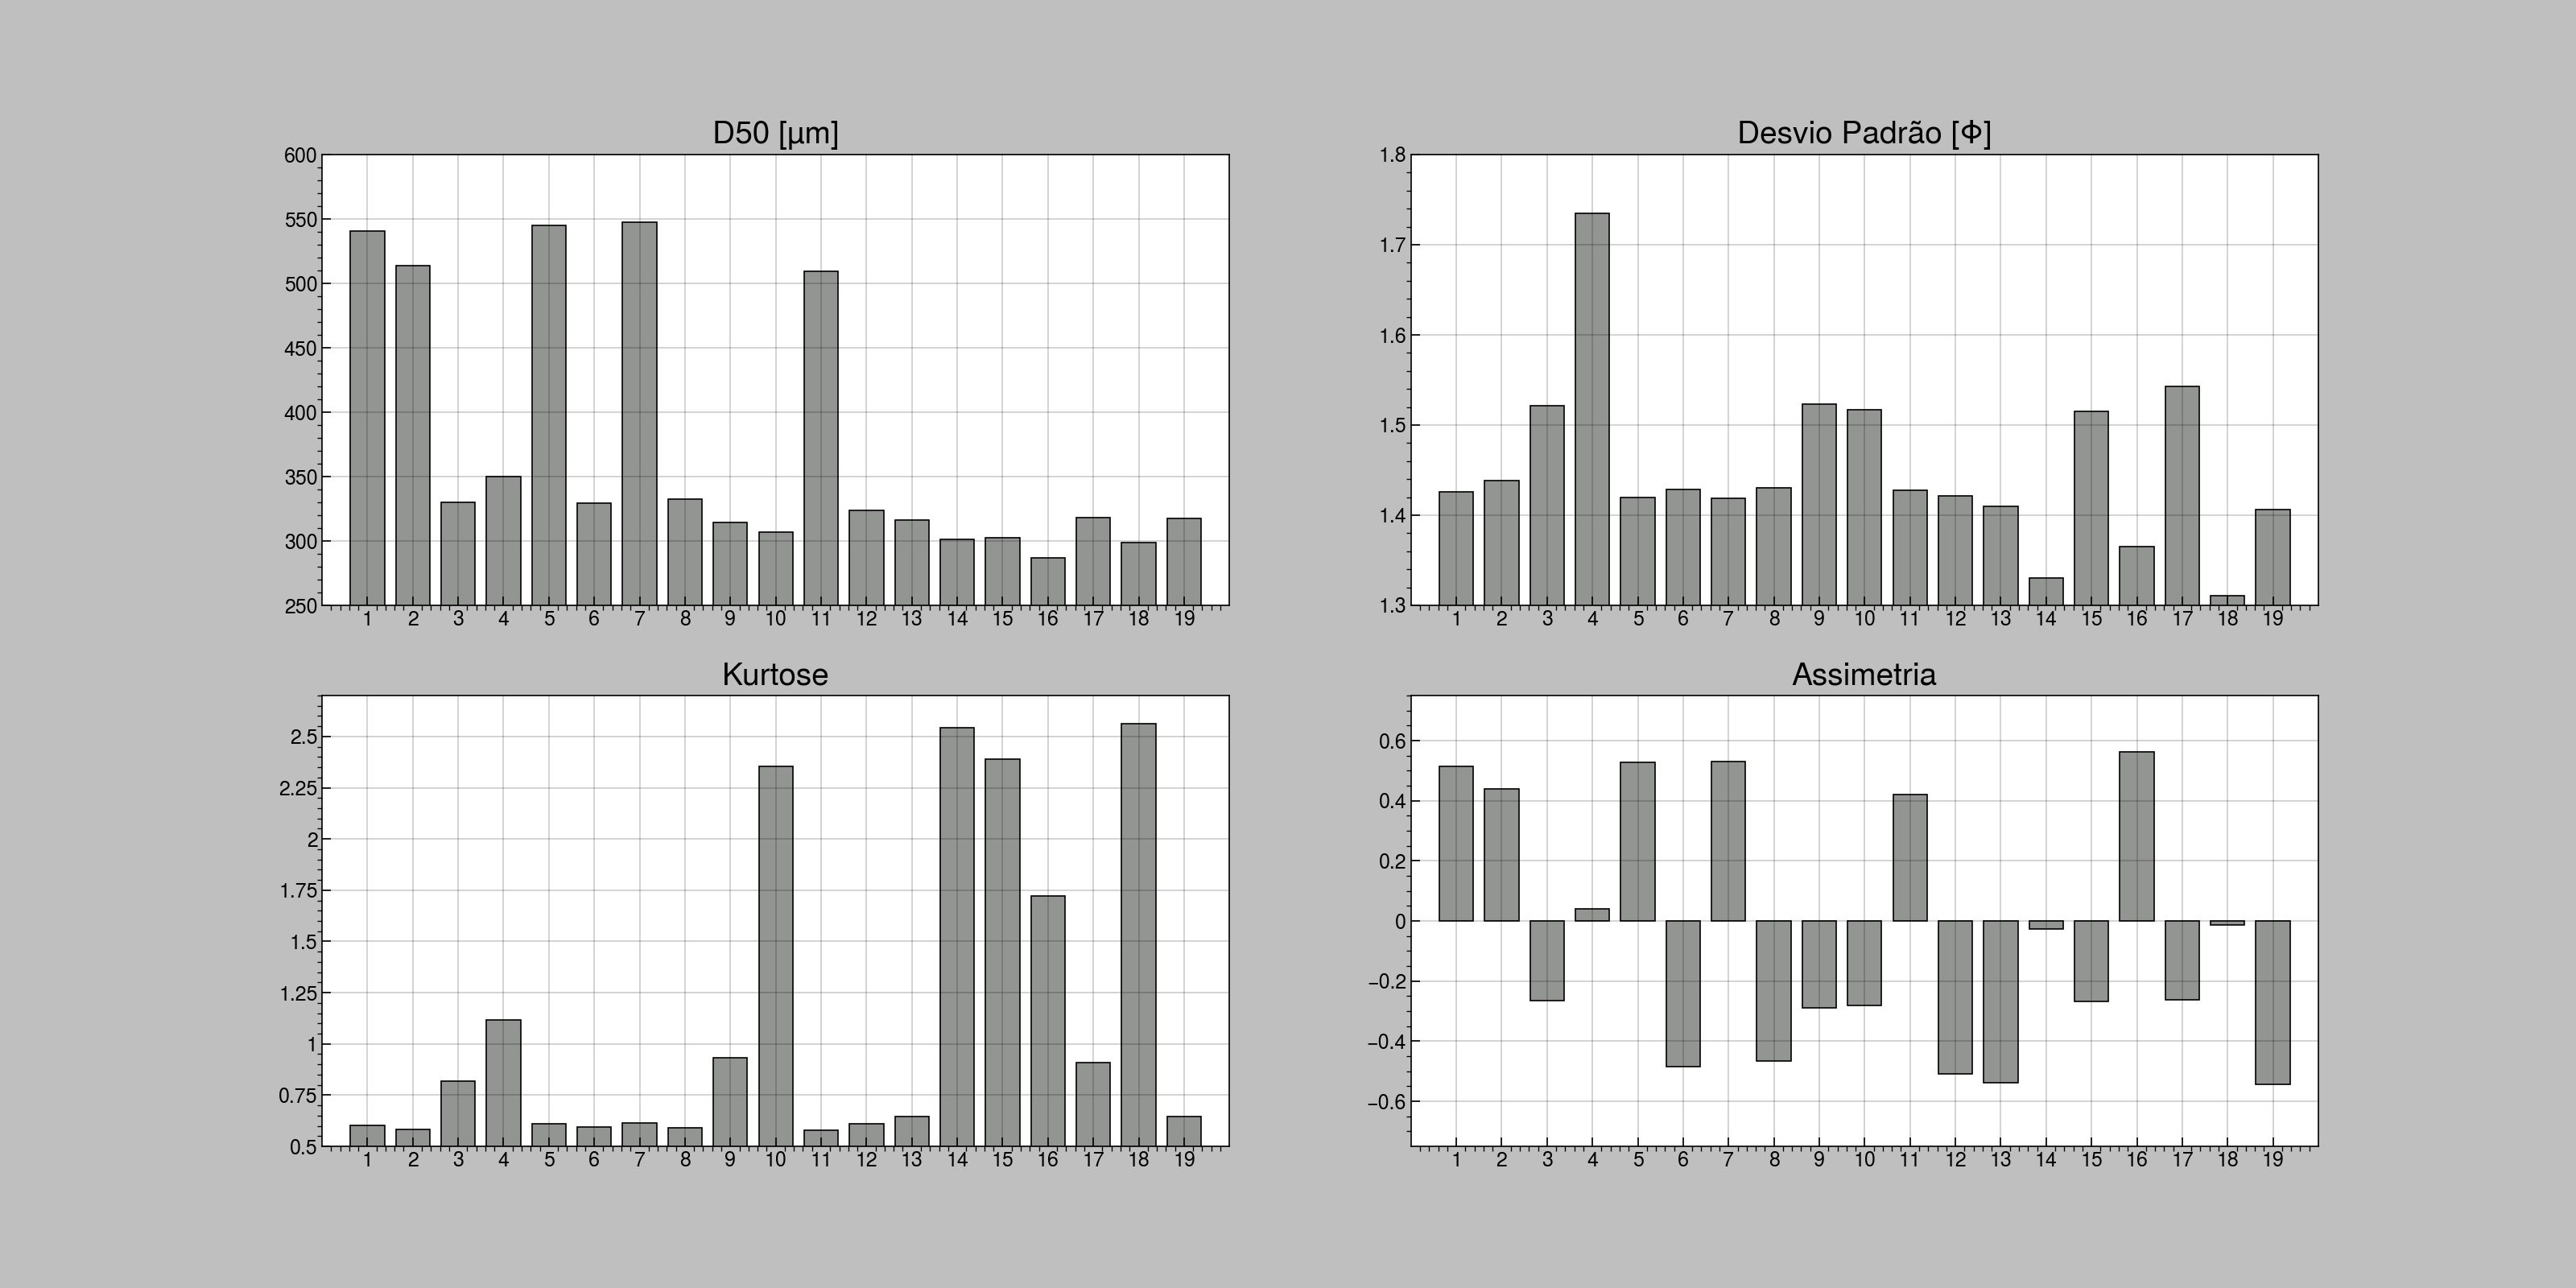

In [ ]:
fig , ax = plt.subplots(nrows=2, ncols=2,figsize=(16,8))
plt.style.use('grayscale')



ax[0,0].bar(sedimento.index, sedimento.D50,width=0.75, edgecolor='k', color='grey')
ax[0,0].grid(alpha=0.2)
ax[0,0].set_ylim(250,600)
ax[0,0].set_xlim(-1, 19)
# plt.yticks(np.arange(-3000000,3000000,500000))
#ax[0,0].set_ylabel('D50 em mm', fontsize=14)
ax[0,0].set_title('D50 [µm]', fontsize=14)
#plt.text(17.5,2300000,'+ ←\n - →', fontsize=24)
ax[0,0].tick_params(axis="y",direction="in",)
ax[0,0].tick_params(axis="x",direction="in",)

ax[0,1].bar(sedimento.index, sedimento.Sorting,width=0.75, edgecolor='k', color='grey')
ax[0,1].grid(alpha=0.2)
ax[0,1].set_ylim(1.3,1.8)
ax[0,1].set_xlim(-1, 19)
# plt.yticks(np.arange(-3000000,3000000,500000))
#ax[0,1].set_ylabel(', fontsize=14)
ax[0,1].set_title('Desvio Padrão [Φ]', fontsize=14)
#plt.text(17.5,2300000,'+ ←\n - →', fontsize=24)
ax[0,1].tick_params(axis="y",direction="in",)
ax[0,1].tick_params(axis="x",direction="in",)

ax[1,0].bar(sedimento.index, sedimento.Kurtose,width=0.75, edgecolor='k', color='grey')
ax[1,0].grid(alpha=0.2)
ax[1,0].set_ylim(0.5,2.7)
ax[1,0].set_xlim(-1, 19)
# plt.yticks(np.arange(-3000000,3000000,500000))
#ax[0,1].set_ylabel(', fontsize=14)
ax[1,0].set_title('Kurtose', fontsize=14)
#plt.text(17.5,2300000,'+ ←\n - →', fontsize=24)
ax[1,0].tick_params(axis="y",direction="in",)
ax[1,0].tick_params(axis="x",direction="in",)

ax[1,1].bar(sedimento.index, sedimento.Assimetria,width=0.75, edgecolor='k', color='grey')
ax[1,1].grid(alpha=0.2)
ax[1,1].set_ylim(-0.75,0.75)
ax[1,1].set_xlim(-1, 19)
# plt.yticks(np.arange(-3000000,3000000,500000))
#ax[0,1].set_ylabel(', fontsize=14)
ax[1,1].set_title('Assimetria', fontsize=14)
#plt.text(17.5,2300000,'+ ←\n - →', fontsize=24)
ax[1,1].tick_params(axis="y",direction="in",)
ax[1,1].tick_params(axis="x",direction="in",)

plt.show()

## Inserindo Mapa

agora vou colocar todos esses dados em um mapa da região de estudo

In [ ]:
# primeiramente, vamos importar os dados de linha de costa
import json
costa = json.load(open('/content/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson')) # esse geojson tá no meu icloud drive

In [ ]:
# ajeitando o dataset 
pontos = pd.read_csv('/content/pontoscampo1.csv', delimiter=';')
pontos['Id'] = np.arange(1,20,1) # criando um ID artificialmente 
pontos

,FID,Id,Coor_x,Coor_y,Q (m^3),Direrao,Selecionamento,Sorting,D50 (mm),Q inverno,Q verao
0,0,1,681793.9689,7456673.911,2735792.51,135.09,Moderately Well Sorted,1.426,540.4,905427.65,942883.76
1,1,2,681995.0374,7456721.772,758338.24,149.91,Moderately Well Sorted,1.438,513.6,243313.41,262018.34
2,2,3,682197.4441,7456761.459,1644623.38,152.42,Moderately Sorted,1.521,329.9,535549.40,565991.40
3,3,4,682402.2320,7456790.828,1361468.77,160.48,Moderately Well Sorted,1.735,349.8,400537.68,525030.78
4,4,5,682600.6699,7456814.640,249124.42,169.77,Moderately Well Sorted,1.420,545.2,70639.62,97767.79
5,5,6,682799.1078,7456810.672,269391.72,172.15,Moderately Well Sorted,1.429,329.3,79156.52,100329.50
6,6,7,683001.5144,7456831.309,186529.53,168.22,Moderately Well Sorted,1.419,547.2,57507.47,66030.67
7,7,8,683199.9523,7456823.372,749674.50,163.34,Moderately Well Sorted,1.430,332.3,255917.30,235711.56
8,8,9,683404.7403,7456823.372,423695.92,165.72,Moderately Well Sorted,1.523,314.6,138332.35,142596.73
9,9,10,683602.3844,7456814.640,705370.51,169.49,Moderately Well Sorted,1.517,306.7,210504.85,265929.98


Atribuindo os valores pras colunas - Fiz manualmente no Sublime, peguei da tabela original do GRADISTAT.

In [ ]:
pontos = pontos[['Id','Coor_x','Coor_y']]
pontos['Tamanho Mediano'] = ['Medium Sand','Medium Sand','Medium Sand','Medium Sand','Medium Sand','Medium Sand',
                             'Medium Sand','Medium Sand','Medium Sand','Medium Sand','Medium Sand','Medium Sand',
                             'Medium Sand','Medium Sand','Medium Sand','Medium Sand','Medium Sand','Medium Sand','Medium Sand',]

pontos['Selecionamento'] = ['Moderately Well Sorted','Moderately Well Sorted','Moderately Well Sorted','Moderately Sorted',
                            'Moderately Well Sorted','Moderately Well Sorted','Moderately Well Sorted','Moderately Well Sorted',
                            'Moderately Well Sorted','Moderately Well Sorted','Moderately Well Sorted','Moderately Well Sorted',
                            'Well Sorted','Well Sorted','Moderately Well Sorted','Well Sorted','Moderately Well Sorted','Well Sorted','Well Sorted']

pontos['Assimetria'] = ['Very Fine Skewed','Very Fine Skewed','Coarse Skewed','Symmetrical','Very Fine Skewed',
                        'Very Coarse Skewed','Very Fine Skewed','Very Coarse Skewed','Coarse Skewed','Coarse Skewed',
                        'Very Fine Skewed','Very Coarse Skewed','Very Coarse Skewed','Symmetrical','Coarse Skewed',
                        'Very Fine Skewed','Coarse Skewed','Symmetrical','Very Coarse Skewed']
                  
pontos['Kurtose'] = ['Very Platykurtic','Very Platykurtic','Platykurtic','Leptokurtic','Very Platykurtic','Very Platykurtic',
                     'Very Platykurtic','Very Platykurtic','Mesokurtic','Very Leptokurtic','Very Platykurtic','Very Platykurtic',
                     'Very Platykurtic','Very Leptokurtic','Very Leptokurtic','Very Leptokurtic','Mesokurtic','Very Leptokurtic',
                     'Very Platykurtic']
pontos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Id,Coor_x,Coor_y,Tamanho Mediano,Selecionamento,Assimetria,Kurtose
0,1,681793.9689,7456673.911,Medium Sand,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
1,2,681995.0374,7456721.772,Medium Sand,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
2,3,682197.4441,7456761.459,Medium Sand,Moderately Well Sorted,Coarse Skewed,Platykurtic
3,4,682402.2320,7456790.828,Medium Sand,Moderately Sorted,Symmetrical,Leptokurtic
4,5,682600.6699,7456814.640,Medium Sand,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
5,6,682799.1078,7456810.672,Medium Sand,Moderately Well Sorted,Very Coarse Skewed,Very Platykurtic
6,7,683001.5144,7456831.309,Medium Sand,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
7,8,683199.9523,7456823.372,Medium Sand,Moderately Well Sorted,Very Coarse Skewed,Very Platykurtic
8,9,683404.7403,7456823.372,Medium Sand,Moderately Well Sorted,Coarse Skewed,Mesokurtic
9,10,683602.3844,7456814.640,Medium Sand,Moderately Well Sorted,Coarse Skewed,Very Leptokurtic


Atribuindo os mesmos valores de areia média pra coluna de tamanho mediano

In [ ]:
pontos['Tamanho Mediano'] = ['Areia Média' for valor in pontos['Tamanho Mediano']]
pontos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,Coor_x,Coor_y,Tamanho Mediano,Selecionamento,Assimetria,Kurtose
0,1,681793.9689,7456673.911,Areia Média,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
1,2,681995.0374,7456721.772,Areia Média,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
2,3,682197.4441,7456761.459,Areia Média,Moderately Well Sorted,Coarse Skewed,Platykurtic
3,4,682402.2320,7456790.828,Areia Média,Moderately Sorted,Symmetrical,Leptokurtic
4,5,682600.6699,7456814.640,Areia Média,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
5,6,682799.1078,7456810.672,Areia Média,Moderately Well Sorted,Very Coarse Skewed,Very Platykurtic
6,7,683001.5144,7456831.309,Areia Média,Moderately Well Sorted,Very Fine Skewed,Very Platykurtic
7,8,683199.9523,7456823.372,Areia Média,Moderately Well Sorted,Very Coarse Skewed,Very Platykurtic
8,9,683404.7403,7456823.372,Areia Média,Moderately Well Sorted,Coarse Skewed,Mesokurtic
9,10,683602.3844,7456814.640,Areia Média,Moderately Well Sorted,Coarse Skewed,Very Leptokurtic


In [ ]:
# estou pegando todos os valores pra selecionamento
for i,j in enumerate(pontos.Selecionamento):
  print(i,j)

0 Moderately Well Sorted
1 Moderately Well Sorted
2 Moderately Well Sorted
3 Moderately Sorted
4 Moderately Well Sorted
5 Moderately Well Sorted
6 Moderately Well Sorted
7 Moderately Well Sorted
8 Moderately Well Sorted
9 Moderately Well Sorted
10 Moderately Well Sorted
11 Moderately Well Sorted
12 Well Sorted
13 Well Sorted
14 Moderately Well Sorted
15 Well Sorted
16 Moderately Well Sorted
17 Well Sorted
18 Well Sorted


Atribuindo os valores de selecionamento nas colunas determinadas

In [ ]:
for i,j in enumerate(pontos.Selecionamento):
  if i == 3:
    pontos.Selecionamento[i] = 'Moderadamente Selecionado'
  elif i in [12,13,17,18]:
      pontos.Selecionamento[i] = 'Bem Selecionado'
  elif i != [3,12,13,17,18]:
    pontos.Selecionamento[i] = 'Moderadamente Bem Selecionado'

pontos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Id,Coor_x,Coor_y,Tamanho Mediano,Selecionamento,Assimetria,Kurtose
0,1,681793.9689,7456673.911,Areia Média,Moderadamente Bem Selecionado,Very Fine Skewed,Very Platykurtic
1,2,681995.0374,7456721.772,Areia Média,Moderadamente Bem Selecionado,Very Fine Skewed,Very Platykurtic
2,3,682197.4441,7456761.459,Areia Média,Moderadamente Bem Selecionado,Coarse Skewed,Platykurtic
3,4,682402.2320,7456790.828,Areia Média,Moderadamente Selecionado,Symmetrical,Leptokurtic
4,5,682600.6699,7456814.640,Areia Média,Moderadamente Bem Selecionado,Very Fine Skewed,Very Platykurtic
5,6,682799.1078,7456810.672,Areia Média,Moderadamente Bem Selecionado,Very Coarse Skewed,Very Platykurtic
6,7,683001.5144,7456831.309,Areia Média,Moderadamente Bem Selecionado,Very Fine Skewed,Very Platykurtic
7,8,683199.9523,7456823.372,Areia Média,Moderadamente Bem Selecionado,Very Coarse Skewed,Very Platykurtic
8,9,683404.7403,7456823.372,Areia Média,Moderadamente Bem Selecionado,Coarse Skewed,Mesokurtic
9,10,683602.3844,7456814.640,Areia Média,Moderadamente Bem Selecionado,Coarse Skewed,Very Leptokurtic


In [ ]:
pontos.Assimetria.value_counts()

Very Fine Skewed      6
Coarse Skewed         5
Very Coarse Skewed    5
Symmetrical           3
Name: Assimetria, dtype: int64

In [ ]:
pontos.Assimetria[pontos.Assimetria == 'Very Fine Skewed']

0     Very Fine Skewed
1     Very Fine Skewed
4     Very Fine Skewed
6     Very Fine Skewed
10    Very Fine Skewed
15    Very Fine Skewed
Name: Assimetria, dtype: object

Tô fazendo o mesmo aqui para a assimetria, mas nesse caso fiz um código mais sofisticado (ainda ta meio bruto)

In [ ]:
for i,j in enumerate(pontos.Assimetria):
  if j == 'Very Fine Skewed':
    pontos.Assimetria[pontos.Assimetria == 'Very Fine Skewed'] = 'Assimetria Para Grãos Muito Finos'
  elif j == 'Coarse Skewed':
    pontos.Assimetria[pontos.Assimetria == 'Coarse Skewed'] = 'Assimetria Para Grãos Grossos'
  elif j == 'Very Coarse Skewed':
    pontos.Assimetria[pontos.Assimetria == 'Very Coarse Skewed'] = 'Assimetria Para Grãos Muito Grossos'
  elif j == 'Symmetrical':
    pontos.Assimetria[pontos.Assimetria == 'Symmetrical'] = 'Simétrico'    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Na curtose foi um pouco mais sofisticado, mas longo. *Será que posso fazer diferente?*

In [ ]:
kurtose = list(set(pontos.Kurtose))
kurtose

['Very Platykurtic',
 'Very Leptokurtic',
 'Platykurtic',
 'Leptokurtic',
 'Mesokurtic']

In [ ]:
for i,j in enumerate(kurtose):
  pontos.Kurtose[pontos.Kurtose == f'{kurtose[0]}'] = 'Muito Platicúrtico'
  pontos.Kurtose[pontos.Kurtose == f'{kurtose[1]}'] = 'Mesocúrtico'
  pontos.Kurtose[pontos.Kurtose == f'{kurtose[2]}'] = 'Muito Leptocúrtico'
  pontos.Kurtose[pontos.Kurtose == f'{kurtose[3]}'] = 'Platicúrtico'
  pontos.Kurtose[pontos.Kurtose == f'{kurtose[4]}'] = 'Leptocúrtico'

pontos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing im

,Id,Coor_x,Coor_y,Tamanho Mediano,Selecionamento,Assimetria,Kurtose
0,1,681793.9689,7456673.911,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
1,2,681995.0374,7456721.772,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
2,3,682197.4441,7456761.459,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Muito Leptocúrtico
3,4,682402.2320,7456790.828,Areia Média,Moderadamente Selecionado,Simétrico,Platicúrtico
4,5,682600.6699,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
5,6,682799.1078,7456810.672,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico
6,7,683001.5144,7456831.309,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
7,8,683199.9523,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico
8,9,683404.7403,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Leptocúrtico
9,10,683602.3844,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Mesocúrtico


Agora que atribuí todos os valores certinho, vou criar um novo csv com isso e transferir pro meu computador

In [ ]:
pontos.to_csv('perfis_com_classe.csv')

In [ ]:
pontos

,Id,Coor_x,Coor_y,Tamanho Mediano,Selecionamento,Assimetria,Kurtose
0,1,681793.9689,7456673.911,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
1,2,681995.0374,7456721.772,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
2,3,682197.4441,7456761.459,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Muito Leptocúrtico
3,4,682402.2320,7456790.828,Areia Média,Moderadamente Selecionado,Simétrico,Platicúrtico
4,5,682600.6699,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
5,6,682799.1078,7456810.672,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico
6,7,683001.5144,7456831.309,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico
7,8,683199.9523,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico
8,9,683404.7403,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Leptocúrtico
9,10,683602.3844,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Mesocúrtico


### Projetando os dados de coordenadas

primeiro, vou instalar o projetor (pyproj) pra projetar os pontos de UTM pra Lat,Lon.

Depois de projetados eu vou inserir as novas coordenadas no dataframe e posteriormente no plot.

In [ ]:
pip install pyproj

     |████████████████████████████████| 6.3 MB 4.6 MB/s 


In [ ]:
from pyproj import Proj # IMPORTANDO O PROJETOR 
#Definindo o datum de entrada e de saída para o projetor
myProj = Proj("+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")  

#Passando a projeção em cima dos dados de batimetria e definindo as variáveis
lon, lat = myProj(pontos['Coor_x'].values, pontos['Coor_y'].values, inverse=True)

In [ ]:
pontos['lon'] = lon
pontos['lat'] = lat
pontos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,Coor_x,Coor_y,Tamanho Mediano,Selecionamento,Assimetria,Kurtose,lon,lat
0,1,681793.9689,7456673.911,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.226431,-22.988322
1,2,681995.0374,7456721.772,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.224476,-22.987868
2,3,682197.4441,7456761.459,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Muito Leptocúrtico,-43.222507,-22.987487
3,4,682402.2320,7456790.828,Areia Média,Moderadamente Selecionado,Simétrico,Platicúrtico,-43.220513,-22.987200
4,5,682600.6699,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.218581,-22.986963
5,6,682799.1078,7456810.672,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico,-43.216645,-22.986977
6,7,683001.5144,7456831.309,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.214674,-22.986768
7,8,683199.9523,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico,-43.212738,-22.986818
8,9,683404.7403,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Leptocúrtico,-43.210740,-22.986796
9,10,683602.3844,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Mesocúrtico,-43.208812,-22.986853


In [ ]:
pontos.to_csv('perfis_com_classe.csv')

In [ ]:
pontos

,Id,Coor_x,Coor_y,Tamanho Mediano,Selecionamento,Assimetria,Kurtose,lon,lat
0,1,681793.9689,7456673.911,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.226431,-22.988322
1,2,681995.0374,7456721.772,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.224476,-22.987868
2,3,682197.4441,7456761.459,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Muito Leptocúrtico,-43.222507,-22.987487
3,4,682402.2320,7456790.828,Areia Média,Moderadamente Selecionado,Simétrico,Platicúrtico,-43.220513,-22.987200
4,5,682600.6699,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.218581,-22.986963
5,6,682799.1078,7456810.672,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico,-43.216645,-22.986977
6,7,683001.5144,7456831.309,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Finos,Muito Platicúrtico,-43.214674,-22.986768
7,8,683199.9523,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Muito Grossos,Muito Platicúrtico,-43.212738,-22.986818
8,9,683404.7403,7456823.372,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Leptocúrtico,-43.210740,-22.986796
9,10,683602.3844,7456814.640,Areia Média,Moderadamente Bem Selecionado,Assimetria Para Grãos Grossos,Mesocúrtico,-43.208812,-22.986853


### Instalando o ProPlot e fazendo a plotagem dos mapas

essa parte demora um pouco porque instala muitos pacotes na máquina virtual.

In [ ]:
# isso aqui evita ficar vendo várias msgs nessa janela
%%capture

# tudo isso aqui vamos usar. Demora um pouquinho para a máquina virtual criar tudo (~2 minutos). Tenha paciência
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely
!pip install geopandas
!pip install salem
!pip install rasterio
!pip install cmocean

In [ ]:
%%capture
# ** exclusive to COLAB
# That was the ultimate "cake recipe" which worked after all. Note that it updates machine packages first
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

# then install cartopy and remove shapely (which doesn't talk to cartopy in collab)
!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely
# and finally reinstall shapely and cartopy in the required version
!pip install --no-binary shapely shapely --force

!pip install --no-binary cartopy cartopy==0.17.0
# finally, install the proplot
!pip install proplot

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:224: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  return cartopy.trace.project_linear(geometry, src_crs, self)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:224: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  return cartopy.trace.project_linear(geometry, src_crs, self)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:224: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  return cartopy.trace.project_linear(geometry, src_crs, self)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:224: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  return cartopy.trace.project_

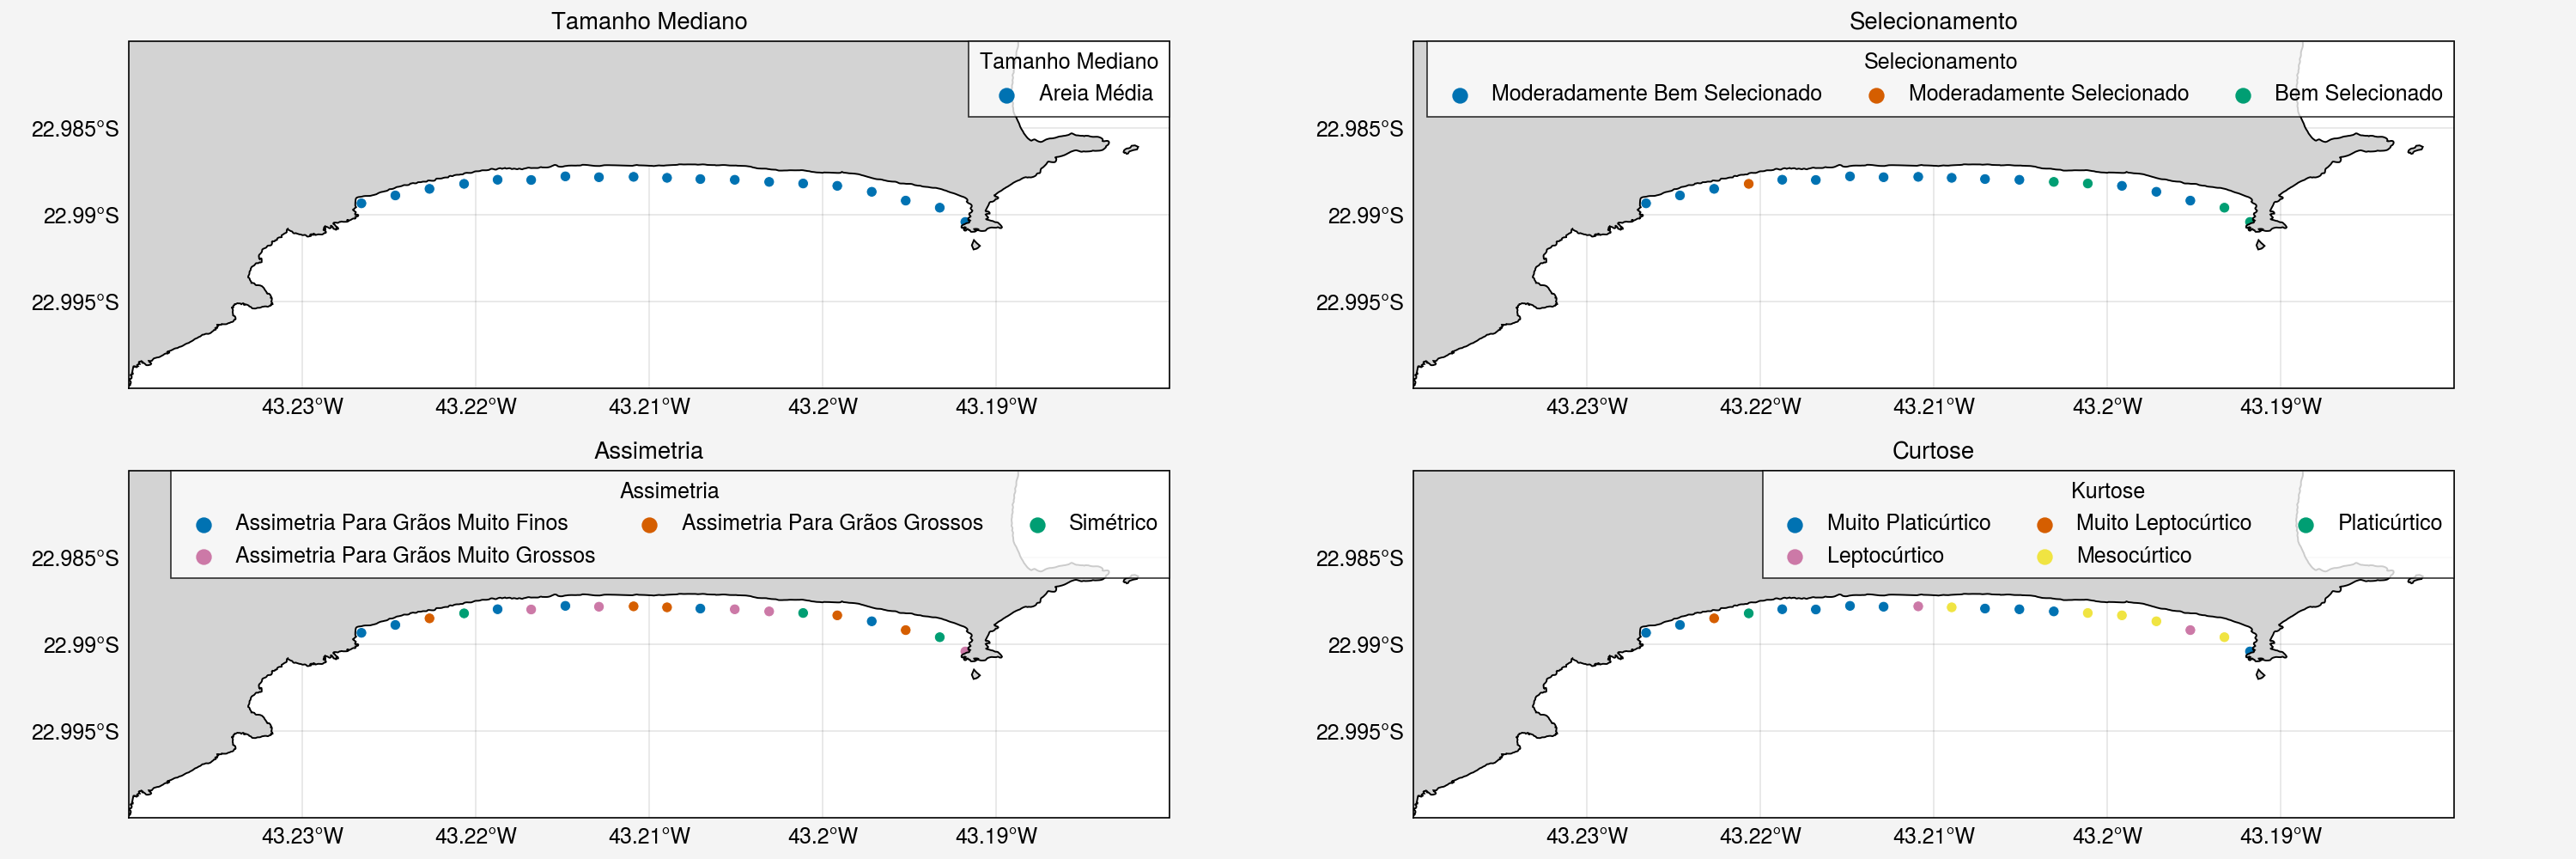

In [ ]:
# dando os imports necessários
import proplot as plot
from shapely.geometry import asShape # manipulando geometria
from descartes import PolygonPatch
from matplotlib import ticker
import seaborn as sns

# formatando minha figura 
fig, ax = plot.subplots(ncols=2,nrows=2, tight=True,proj='pcarree',figsize=(15,5))
ax[0,0].format(coast=False, borders=False, innerborders=False, labels=True, latlines=0.005, lonlines=0.01,
          latlim=(-22.98,-23), lonlim=(-43.18,-43.24),title='Tamanho Mediano')
ax[0,1].format(coast=False, borders=False, innerborders=False, labels=True, latlines=0.005, lonlines=0.01,
          latlim=(-22.98,-23), lonlim=(-43.18,-43.24),title='Selecionamento')
ax[1,0].format(coast=False, borders=False, innerborders=False, labels=True, latlines=0.005, lonlines=0.01,
          latlim=(-22.98,-23), lonlim=(-43.18,-43.24),title='Assimetria')
ax[1,1].format(coast=False, borders=False, innerborders=False, labels=True, latlines=0.005, lonlines=0.01,
          latlim=(-22.98,-23), lonlim=(-43.18,-43.24),title='Curtose')

# plotando as linhas de costa
for feat in costa["features"]:
    # convertendo a geometria p/ shapely
    geom = asShape(feat["geometry"])
    
ax[0,0].add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',alpha=1, lw=0.7, ls='-', zorder=2))
ax[0,1].add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',alpha=1, lw=0.7, ls='-', zorder=2))
ax[1,0].add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',alpha=1, lw=0.7, ls='-', zorder=2))
ax[1,1].add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',alpha=1, lw=0.7, ls='-', zorder=2))

ax[0,0].set_xlim(-43.24,-43.18)
ax[0,0].set_ylim(-23,-22.98)
ax[0,1].set_xlim(-43.24,-43.18)
ax[0,1].set_ylim(-23,-22.98)
ax[1,0].set_xlim(-43.24,-43.18)
ax[1,0].set_ylim(-23,-22.98)
ax[1,1].set_xlim(-43.24,-43.18)
ax[1,1].set_ylim(-23,-22.98)

a = sns.scatterplot(pontos.lon-0.00015, pontos.lat-0.001, hue=pontos['Tamanho Mediano'], ax=ax[0,0],markersize=20)
b = sns.scatterplot(pontos.lon-0.00015, pontos.lat-0.001, hue=pontos.Selecionamento, ax=ax[0,1],markersize=20)
c = sns.scatterplot(pontos.lon-0.00015, pontos.lat-0.001, hue=pontos.Assimetria, ax=ax[1,0],markersize=20)
d = sns.scatterplot(pontos.lon-0.00015, pontos.lat-0.001, hue=pontos.Kurtose, ax=ax[1,1],markersize=20)

plt.tight_layout(pad=0.25)

ax[0,0].tick_params(axis="y",direction="in",)
ax[0,0].tick_params(axis="x",direction="in",)
ax[0,1].tick_params(axis="y",direction="in",)
ax[0,1].tick_params(axis="x",direction="in",)
ax[1,0].tick_params(axis="y",direction="in",)
ax[1,0].tick_params(axis="x",direction="in",)
ax[1,1].tick_params(axis="y",direction="in",)
ax[1,1].tick_params(axis="x",direction="in",)



plt.show()